In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy.linalg import inv
from matplotlib import pyplot
%matplotlib inline

In [ ]:
from numpy.core.fromnumeric import shape
# Conjugate Gradient method
def CongjugateGradient(A, b, tol):
  # Initializa x
  x = np.zeros((A.shape[0], 1))
  # Calculate r = Ax - b
  r = A @ x - b
  # Assign p = -r
  pk = -r
  # For k = 0, 1, 2, ....
  k = 0
  while LA.norm(r) > 0:
    # Calculate Alpha = -r^T * pk / p^T * A * p
    Alpha_k = (-(r.T) * pk) / ((pk.T) @ A @ pk)
    # Update x = x + Alpha_k * pk
    x = x + Alpha_k @ pk
    # Calculate r
    r = A @ x - b
    # Calculate Beta
    Beta = ((r.T) @ A @ pk) / ((pk.T) @ A @ pk)
    # Update pk = -r + Beta * pk
    pk = (-r.T) + Beta * pk
    k = k + 1
  return x, k



In [ ]:
# Rosenbrock function with A = 1 and A = 100
def Rosenbrock_func(A, s):
  func = A * (s[1, 0] - s[0, 0]**2)**2 + (1 - (s[0, 0]))**2
  return func

In [ ]:
# Fletcher-Reeves Non-linear Conjugate Gradient method 
def FR_CG_A1(x0, rho, alpha_0, c, tol):
  x = x0
  cost = []
  norm = []

  # Define Gradient function
  g_func = np.array([[-4 * x[0, 0] * (x[1, 0] - x[0, 0]**2) - 2 * (1 - x[0, 0])], [2 * (x[1, 0] - x[0, 0]**2)]])
  # Assign pk = -grad_func
  pk = -g_func
  k = 0
  count = 0

  while LA.norm(g_func) > tol:
    # gradient_f = np.array([[-4 * x[0,0] * (x[1, 0] - x[0, 0]**2) - 2 * (1 - x[0, 0])], [2 * (x[1, 0] - x[0, 0]**2)]])
    grad_func = np.array([[-4 * x[0, 0] * (x[1, 0] - x[0, 0]**2) - 2 * (1 - x[0, 0])], [2 * (x[1, 0] - x[0, 0]**2)]])
    alpha = alpha_0
    while Rosenbrock_func(1, x + alpha * (pk)) > Rosenbrock_func(1, x) + c * alpha * ((grad_func.T) @ (pk)):
      alpha = rho * alpha
      count += 2

    x = x + alpha * (pk)
    grad_func_one = np.array([[-4 * x[0, 0] * (x[1, 0] - x[0, 0]**2) - 2 * (1 - x[0, 0])], [2 * (x[1, 0] - x[0, 0]**2)]])
    FR_beta = ((grad_func_one.T) @ (grad_func_one)) / ((grad_func.T) @ (grad_func))
    pk = -grad_func_one + FR_beta * pk

    # Check descent direction
    if pk.T @ grad_func_one > 0:
      pk = -np.array([[-4 * x[0, 0] * (x[1, 0] - x[0, 0]**2) - 2 * (1 - x[0, 0])], [2 * (x[1, 0] - x[0, 0]**2)]])
    
    k = k + 1
    g_func = grad_func_one

    cost.append(Rosenbrock_func(1,x))
    norm.append(LA.norm(grad_func_one))

  #print('norm after iteration:',LA.norm(grad_f),'\n')
  print('function eval:', count)
  print('x position after algrithm:', x,'\n')
  print('iter took :',k ,'\n')
  print('function valuve at x is :',Rosenbrock_func(1,x),'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  pyplot.yscale('log')
  plt.plot(cost)
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  pyplot.yscale('log')
  plt.plot(norm)
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  return x



   

function eval: 74
x position after algrithm: [[1.00052773]
 [1.00127929]] 

iter took : 15 

function valuve at x is : 3.284753368254269e-07 





cost value graph 



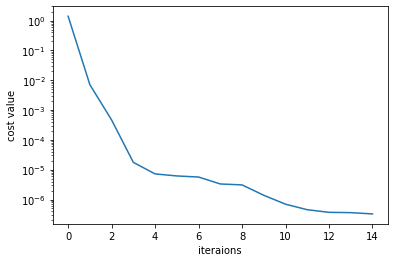





grad norm graph 



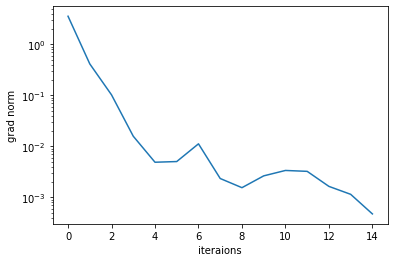

array([[1.00052773],
       [1.00127929]])

In [ ]:
FR_CG_A1(x0 = np.array([[-1.2],[1.]]), 
         rho = 0.5,
         alpha_0 = 1, 
         c = 0.01, 
         tol = 1e-3)

In [ ]:
def FR_CG_A100(x0, rho, alpha_0, c, tol):
  x = x0
  cost = []
  norm = []

  # Define Gradient function
  g_func = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])
  # Assign pk = -grad_func
  pk = -g_func
  k = 0
  count = 0 

  while LA.norm(g_func) > tol:
    grad_func = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])
    alpha = alpha_0
    while Rosenbrock_func(100, x + alpha * (pk)) > Rosenbrock_func(100, x) + c * alpha * ((grad_func.T) @ (pk)):
      alpha = rho * alpha
      count += 2

    x = x + alpha * (pk)
    grad_func_one = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])
    FR_beta = ((grad_func_one.T) @ (grad_func_one)) / ((grad_func.T) @ (grad_func))
    pk = -grad_func_one + FR_beta * pk

    # Check descent direction
    if pk.T @ grad_func_one > 0:
      pk = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])
    
    k = k + 1
    g_func = grad_func_one

    cost.append(Rosenbrock_func(100, x))
    norm.append(LA.norm(grad_func_one))

  #print('norm after iteration:',LA.norm(grad_f),'\n')
  print('function eval:', count)
  print('x position after algrithm:', x,'\n')
  print('iter took :',k ,'\n')
  print('function valuve at x is :',Rosenbrock_func(1,x),'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  pyplot.yscale('log')
  plt.plot(cost)
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  pyplot.yscale('log')
  plt.plot(norm)
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  return x


function eval: 3720
x position after algrithm: [[0.99980077]
 [0.99960068]] 

iter took : 152 

function valuve at x is : 3.96921639917385e-08 





cost value graph 



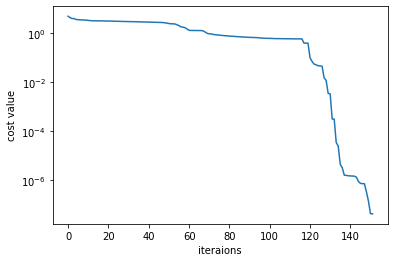





grad norm graph 



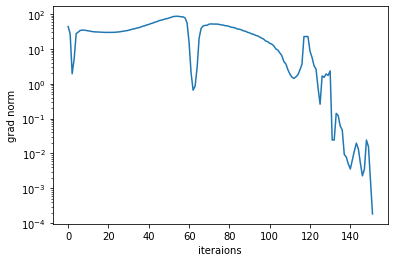

array([[0.99980077],
       [0.99960068]])

In [ ]:
FR_CG_A100(x0 = np.array([[-1.2],[1.]]), 
         rho = 0.5,
         alpha_0 = 1, 
         c = 0.01, 
         tol = 1e-3)